# Wstęp do Sztucznej Inteligencji - rok akademicki 2020/2021

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat:  Wnioskowanie oparte na wiedzy niepewnej. Wnioskowanie rozmyte
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

Na niniejszych laboratoriach będziemy wykorzystywać bibliotekę `fuzzython`(https://github.com/yudivian/fuzzython). Orginalny moduł zawierał kilka błędów przez co nie dało się go zainstalować za pomocą `pip`. Aby móc z niego zkorzystać należy pobrać zmodyfikowany moduł `fuzzython.zip` (plik dostępny na delcie), rozpakować go i wrzucić na dysk google, a następnie wykonać poniższą komórkę montującą dysk google:


In [ ]:
import sys
from google.colab import drive
drive.mount('/content/drive')
# upewniej się że poniższa ścieżka jest poprawna
path_nb = r'/content/drive/My Drive/Colab Notebooks/'
sys.path.append(path_nb)

Mounted at /content/drive


Przy importowaniu elementów z modułu `fuzzython` używamy konstrukcji:
```python
from fuzzython.nazwa_podmodulu import jakies, funkcje, klasy, itp.
```

## Zadanie 1 (obowiązkowe, 5pkt)
Zaprojektuj system rozmyty typu Mamdani, który będzie oceniał stopień przekonania o możliwości spowodowania wypadku podczas jazdy samochodem.

Zmienne wejściowe: 

- prędkość jazdy (10 − 200km/h ): `mała`, `średnia`, `szybka`, `bardzo szybka` 
- widoczność (0.05 − 4km): `bardzo słaba`, `średnia`, `dobra`. 

Wyjście systemu: 

- stopień przekonania o możliwości spowodowania wypadku (0 − 1): `bardzo małe`, `małe`, `średnie`, `duże`.

Zdefiniuj własne kształty dla zbiorów rozmytych, stwórz własne reguły oraz przygotuj wykresy ilustrujące funkcje przynależności zbiorów rozmytych jak również powierzchnię decyzyjną sterownika rozmytego.

### TWÓJ PROGRAM:

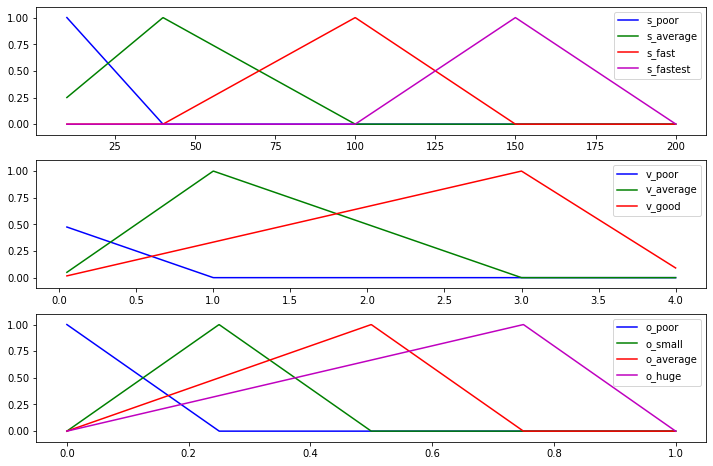

{'rb_mamdani': {'degree': 0.44570151302266264}}


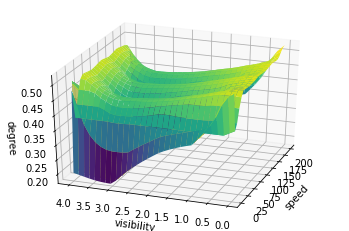

In [18]:
#YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
from fuzzython.fsets.fuzzy_set import FuzzySet
from fuzzython.ruleblock import RuleBlock
from fuzzython.systems.mamdani import MamdaniSystem
from mpl_toolkits.mplot3d import Axes3D  


# pomocnicza funkcja do rysowania zbiorów rozmytych
def plot_fuzzyset(ax, fuzzy_set, x, *args, **kwargs):
    y = np.array([fuzzy_set(e) for e in x])
    ax.plot(x, y,  *args, **kwargs)
    ax.set_ylim(-0.1, 1.1)
    ax.legend()



from fuzzython.fsets.triangular import Triangular
# klasa Variable - zmienna lingwistyczna
from fuzzython.variable import Variable
# klasa Adjective - wartość zmiennej lingwistycznej
from fuzzython.adjective import Adjective


# zmienna lingwistyczna `speed` opisująca prędkość jazdy w skali od 10 do 200 km/h 
# wartości lingwistyczne, trójkątne zbiory rozmyte: `s_poor`, `s_average`, `s_fast`, `s_fastest`

s_poor = Triangular((9.9,0), (10,1), (40,0))
s_average = Triangular((0,0), (40,1), (100,0))
s_fast = Triangular((40,0), (100,1), (150,0))
s_fastest = Triangular((100,0), (150,1), (200.1,0))
a_s_poor = Adjective('s_poor', s_poor)
a_s_average = Adjective('s_', s_average)
a_s_fast = Adjective('s_fast', s_fast)
a_s_fastest = Adjective('s_fastest', s_fastest)

speed = Variable('speed', 'km/h', a_s_poor, a_s_average, a_s_fast, a_s_fastest)

# zmienna lingwistyczna `visibility` opisująca widocznosc  w skali od 0.05 do 4 km 
# trzy wartości lingwistyczne, trójkątne zbiory rozmyte: `v_poor`, `v_average`, `v_good`

v_poor = Triangular((-0.05,0), (0,0.5), (1.0,0))
v_average = Triangular((0,0), (1.0,1), (3.0,0))
v_good = Triangular((0,0), (3.0,1), (4.1,0))
a_v_poor = Adjective('v_poor', v_poor)
a_v_average = Adjective('v_average', v_average)
a_v_good = Adjective('v_good', v_good)

visibility = Variable('visibility', 'km', a_v_poor, a_v_average, a_v_good)


# zmienna lingwistyczna `out_percent` opisująca stopien przekonania  w skali od 0 do 1
# cztery wartości lingwistyczne, trójkątne zbiory rozmyte: `o_poor`, `o_small`, `o_average`, `o_huge`
#OUT

o_poor = Triangular((-0.1,0), (0,1), (0.25,0))
o_small = Triangular((0,0), (0.25,1), (0.5,0))
o_average = Triangular((0,0), (0.5,1), (0.75,0))
o_huge = Triangular((0,0), (0.75,1), (1,0))
a_o_poor = Adjective('o_poor', o_poor)
a_o_small = Adjective('o_small', o_small)
a_o_average = Adjective('o_average', o_average)
a_o_huge = Adjective('o_huge', o_huge)

degree = Variable('degree', '%', a_o_poor, a_o_small, a_o_average, a_o_huge, defuzzification='COG', default=0)

# wykresy poglądowe
x0 = np.linspace(10,200,1000)
x1 = np.linspace(0.05,4,1000)
x2 = np.linspace(0,1,1000)
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,8))
((ax0), (ax1), (ax2)) = axs
plot_fuzzyset(ax0, s_poor, x0, 'b', label='s_poor')
plot_fuzzyset(ax0, s_average, x0, 'g', label='s_average')
plot_fuzzyset(ax0, s_fast, x0, 'r', label='s_fast')
plot_fuzzyset(ax0, s_fastest, x0, 'm', label='s_fastest')
plot_fuzzyset(ax1, v_poor, x1, 'b', label='v_poor')
plot_fuzzyset(ax1, v_average, x1, 'g', label='v_average')
plot_fuzzyset(ax1, v_good, x1, 'r', label='v_good')
plot_fuzzyset(ax2, o_poor, x2, 'b', label='o_poor')
plot_fuzzyset(ax2, o_small, x2, 'g', label='o_small')
plot_fuzzyset(ax2, o_average, x2, 'r', label='o_average')
plot_fuzzyset(ax2, o_huge, x2, 'm', label='o_huge')

plt.show()


scope = locals()

rule1 = 'if speed is a_s_poor or visibility is a_v_good then degree is a_o_poor'

rule2 = 'if speed is a_s_poor or visibility is a_v_average then degree is a_o_small'
rule3 = 'if speed is a_s_average or visibility is a_v_good then degree is a_o_small'
rule4 = 'if speed is a_s_fast or visibility is a_v_good then degree is a_o_small'
rule5 = 'if speed is a_s_fastest or visibility is a_v_good then degree is a_o_small'

rule6 = 'if speed is a_s_poor or visibility is a_v_poor then degree is a_o_average'
rule7 = 'if speed is a_s_average or visibility is a_v_average then degree is a_o_average'
rule8 = 'if speed is a_s_fastest or visibility is a_v_average then degree is a_o_average'
rule9 = 'if speed is a_s_fast or visibility is a_v_average then degree is a_o_average'

rule10 = 'if speed is a_s_average or visibility is a_v_poor then degree is a_o_huge'
rule11 = 'if speed is a_s_fast or visibility is a_v_poor then degree is a_o_huge'
rule12 = 'if speed is a_s_fastest or visibility is a_v_poor then degree is a_o_huge'




#oper
block = RuleBlock('rb_mamdani', operators=('MIN','MAX','ZADEH'), activation='MIN', accumulation='MAX')
block.add_rules(rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, scope=scope)

mamdani = MamdaniSystem('mamdani_model', block)

# dane wejściowe
inputs = {'speed': 110, 'visibility': 1.7}
# obliczenie odpowiedzi
res = mamdani.compute(inputs)
#zwraca słownik
print(res)


# przygotowanie siatki
sampledspeed = np.linspace(0, 200, 30)
sampledvisibility = np.linspace(0.05, 4, 30)
x, y = np.meshgrid(sampledspeed, sampledvisibility)
z = np.zeros((len(sampledspeed),len(sampledvisibility)))

for i in range(len(sampledspeed)):
    for j in range(len(sampledvisibility)):
        inputs = {'speed': x[i, j], 'visibility': y[i, j]}
        res = mamdani.compute(inputs)
        z[i, j] = res['rb_mamdani']['degree']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset= -1, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset= 11, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset= 11, cmap='viridis', alpha=0.5)
ax.set_xlabel('speed')
ax.set_ylabel('visibility')
ax.set_zlabel('degree')
ax.view_init(30, 200)

## Zadanie 2 (obowiązkowe, 5pkt)
Zaprojektuj system rozmyty typu Takagi-Sugeno, który będzie prognozował cenę akcji na jeden dzień do przodu.

Zmienne wejściowe: 

- cena akcji wczoraj (1 − 20zł): `niska`, `średnia`, `wysoka`, 

- cena akcji dziś (1 − 20zł): `niska`, `średnia`, `wysoka`. 

Wyjście systemu: 

- cena akcji jutro dana równaniem regresji: $\alpha\cdot x + \beta\cdot y + \gamma$

Reguły postaci:

- Jeśli cena akcji wczoraj była $A_i$ i cena akcji dziś jest $B_i$ to cena akcji jutro będzie $\alpha_k\cdot x + \beta_k\cdot y + \gamma_k$,

gdzie:

- $x$ to cena akcji wczoraj (ostra wartość)

- $y$ to cena akcji dziś (ostra wartość)

- $A_i, B_i$ to zbiory rozmyte odpowiednio dla ceny akcji wczoraj i dziś

- $\alpha_k, \beta_k, \gamma_k$ - współczynniki w równaniu regresji (liczby rzeczywiste)

- $k$ - numer reguły

Zdefiniuj własne kształty dla zbiorów rozmytych, stwórz własne reguły (dobór współczynników regresji) oraz przygotuj wykresy ilustrujące funkcje przynależności zbiorów rozmytych jak również powierzchnię decyzyjną sterownika rozmytego.

### TWÓJ PROGRAM:

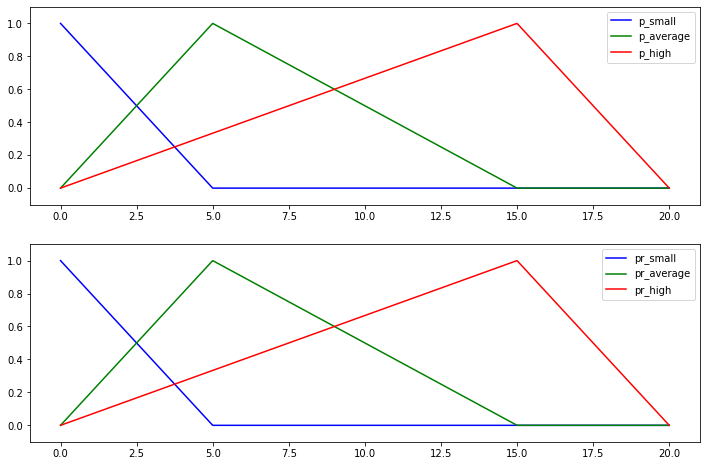

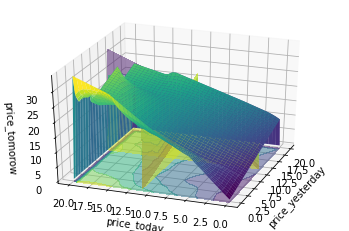

In [27]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
from fuzzython.ruleblock import RuleBlock
from fuzzython.systems.sugeno import SugenoSystem
from fuzzython.fsets.fuzzy_set import FuzzySet
from mpl_toolkits.mplot3d import Axes3D  

# prosty przykład z użyciem trójkątnych zbiorów rozmytych
from fuzzython.fsets.triangular import Triangular
# klasa Variable - zmienna lingwistyczna
from fuzzython.variable import Variable
# klasa Adjective - wartość zmiennej lingwistycznej
from fuzzython.adjective import Adjective


# pomocnicza funkcja do rysowania zbiorów rozmytych
def plot_fuzzyset(ax, fuzzy_set, x, *args, **kwargs):
    y = np.array([fuzzy_set(e) for e in x])
    ax.plot(x, y,  *args, **kwargs)
    ax.set_ylim(-0.1, 1.1)
    ax.legend()

# zmienna lingwistyczna `price_yesterday` opisujaca dene wczoraj w  skali od 1 do 20 złotych
# trzy wartości lingwistyczne, trójkątne zbiory rozmyte: `p_small`, `p_average`, `p_high`

p_small = Triangular((-0.1,0), (0,1), (5.0,0))
p_average = Triangular((0,0), (5.0,1), (15,0))
p_high = Triangular((0,0), (15,1), (20,0))
a_p_small = Adjective('p_small', p_small)
a_p_average = Adjective('p_average', p_average)
a_p_high = Adjective('p_high', p_high)
price_yesterday = Variable('price_yesterday', 'zł', a_p_small, a_p_average, a_p_high)


# zmienna lingwistyczna `price_today`opisujaca cene dzisiaj  w skali od 1 do 20 złotych
# trzy wartości lingwistyczne, trójkątne zbiory rozmyte: `pr_small`, `pr_average`, `pr_small`

pr_small = Triangular((-0.1,0), (0,1), (5.0,0))
pr_average = Triangular((0,0), (5.0,1), (15,0))
pr_high = Triangular((0,0), (15,1), (20,0))
a_pr_small = Adjective('pr_small', pr_small)
a_pr_average = Adjective('pr_average', pr_average)
a_pr_high = Adjective('pr_high', pr_high)
price_today = Variable('price_today', 'zł', a_pr_small, a_pr_average, a_pr_high)


# wykresy poglądowe
x0 = np.linspace(0,20,1000)
x1 = np.linspace(0,20,1000)
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
((ax0), (ax1)) = axs

plot_fuzzyset(ax0, p_small, x0, 'b', label='p_small')
plot_fuzzyset(ax0, p_average, x0, 'g', label='p_average')
plot_fuzzyset(ax0, p_high, x0, 'r', label='p_high')
plot_fuzzyset(ax1, pr_small, x1, 'b', label='pr_small')
plot_fuzzyset(ax1, pr_average, x1, 'g', label='pr_average')
plot_fuzzyset(ax1, pr_high, x1, 'r', label='pr_high')

plt.show()


#rulesmod

scope = locals()

rule1 = 'if price_yesterday is a_p_small and price_today is a_pr_small then z=price_yesterday*0.4+price_today*0.4'
rule2 = 'if price_yesterday is a_p_small and price_today is a_pr_average then z=price_yesterday*0.5+price_today*1+5'
rule3 = 'if price_yesterday is a_p_small and price_today is a_pr_high then z=price_yesterday*0.3+price_today*1+15'
rule4 = 'if price_yesterday is a_p_average and price_today is a_pr_small then z=price_yesterday*0.5+price_today*1'
rule5 = 'if price_yesterday is a_p_average and price_today is a_pr_average then z=price_yesterday*0.5+price_today*0.5'
rule6 = 'if price_yesterday is a_p_average and price_today is a_pr_high then z=price_yesterday*0.5+price_today*1+7'
rule7 = 'if price_yesterday is a_p_high and price_today is a_pr_small then z=price_yesterday*0.5+price_today*1'
rule8 = 'if price_yesterday is a_p_high and price_today is a_pr_average then z=price_yesterday*0.5+price_today*1'
rule9 = 'if price_yesterday is a_p_high and price_today is a_pr_high then z=price_yesterday*0.6+price_today*0.6'



block = RuleBlock('rb_takagi', operators=('MIN', 'MAX', 'ZADEH'), activation='MIN', accumulation='MAX')
block.add_rules(rule1, rule2, rule3,rule4, rule5, rule6, rule7, rule8, rule9, scope=scope)




sugeno = SugenoSystem('model_takagi', block)


# dane wejściowe
inputs = {'price_yesterday': 10, 'price_today': 20}
# obliczenie odpowiedzi
res = sugeno.compute(inputs)
# zwraca słownik, trochę inaczej niż w mamdani
res

# przygotowanie siatki
sampled = np.linspace(0,20,40)
x, y = np.meshgrid(sampled, sampled)
z = np.zeros((len(sampled),len(sampled)))

for i in range(len(sampled)):
    for j in range(len(sampled)):
        inputs = {'price_yesterday': x[i, j], 'price_today': y[i, j]}
        res = sugeno.compute(inputs)
        z[i, j] = res['rb_takagi']


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
cset = ax.contourf(x, y, z, zdir='z', offset= -1, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='x', offset= 11, cmap='viridis', alpha=0.5)
cset = ax.contourf(x, y, z, zdir='y', offset= 11, cmap='viridis', alpha=0.5)
ax.set_xlabel('price_yesterday')
ax.set_ylabel('price_today')
ax.set_zlabel('price_tomorow')
ax.view_init(30, 200)


&copy; Katedra Informatyki, Politechnika Krakowska